## Importação da libs

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

### Carregamento dos dados

In [32]:
df = pd.read_csv('C:\\Users\\Guilherme\\Downloads\\listings.csv')

### Uma primeira olhada nos dados

In [33]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211224070558,2021-12-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.90,4.76,4.66,NaN,f,1,1,0,0,1.92
1,24480,https://www.airbnb.com/rooms/24480,20211224070558,2021-12-25,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.90,4.97,4.58,NaN,f,1,1,0,0,0.62
2,25026,https://www.airbnb.com/rooms/25026,20211224070558,2021-12-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.90,4.81,4.56,NaN,f,1,1,0,0,1.69
3,35636,https://www.airbnb.com/rooms/35636,20211224070558,2021-12-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,4.88,4.90,4.65,NaN,f,1,1,0,0,1.82
4,35764,https://www.airbnb.com/rooms/35764,20211224070558,2021-12-25,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,4.94,4.94,4.87,NaN,f,1,1,0,0,2.76


### São 24555 linhas e 74 colunas ou features.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24549 non-null  int64  
 1   listing_url                                   24549 non-null  object 
 2   scrape_id                                     24549 non-null  int64  
 3   last_scraped                                  24549 non-null  object 
 4   name                                          24528 non-null  object 
 5   description                                   23336 non-null  object 
 6   neighborhood_overview                         13212 non-null  object 
 7   picture_url                                   24549 non-null  object 
 8   host_id                                       24549 non-null  int64  
 9   host_url                                      24549 non-null 

### É possível notar que as variável se dividem em: pertinentes ao dono do imóvel (host), pertinentes ao imóvel e pertinentes ao ato de locação (disponibilidade, preço etc)

## Agora vamos analisar a variável alvo "room_type" que será o nosso y (y = f(x)) 

In [35]:
Y = df['room_type']
Y.value_counts()

Entire home/apt    18564
Private room        5415
Shared room          494
Hotel room            76
Name: room_type, dtype: int64

### É possível notar que a variável alvo é do tipo categórica (problema de classificação múltipla) e que são 4 os possíveis valores de y (classes). É possível notar que as classes estão consideravelmente desbalanceadas, fazendo com que a métrica acurácia perca o significado se usarmos os dados como estão.

### Das 74 features disponíves, vamos selecionar as variáveis que forem mais próximas do domínio da variável. Como a variável alvo é sobre o imóvel, vamos selecionar features que são pertinentes ao imóvel.

### Vamos também remover amostras que possuam algum valor faltante das features selecionadas

In [36]:
#data_1 = df.loc[df['room_type'] == 'Entire home/apt'].sample( int( (len(df.loc[df['room_type'] == 'Entire home/apt']) ) ))
#data_2 = df.loc[df['room_type'] == 'Private room'].sample( int( (len(df.loc[df['room_type'] == 'Private room']) )   ))
#data_3 = df.loc[df['room_type'] == 'Shared room'].sample( int( (len(df.loc[df['room_type'] == 'Shared room']) )  ))
#data_4 = df.loc[df['room_type'] == 'Hotel room'].sample( int( (len(df.loc[df['room_type'] == 'Hotel room']) )   ))
#frames = [data_1, data_2,data_3,data_4]
#df = pd.concat(frames)
df = [df["description"],df["host_listings_count"], df["host_total_listings_count"],df["host_verifications"]
,df["host_identity_verified"],df["neighbourhood_cleansed"],df["property_type"],df['accommodates'],df['bathrooms_text'],
df['bedrooms'],df['beds'],df['price'],df['minimum_nights'],df['maximum_nights'],df['availability_365'],df['room_type'] ]

headers = ["description","host_listings_count", "host_total_listings_count","host_verifications"
,"host_identity_verified","neighbourhood_cleansed","property_type",'accommodates','bathrooms_text',
'bedrooms','beds','price','minimum_nights','maximum_nights','availability_365','room_type']

df = pd.concat(df, axis=1, keys=headers)
df = df.dropna()
Y = df['room_type']

### Selecionando 16 variáveis, sendo a maioria pertinentes ao imóvel e algumas poucas relacionadas ao dono do imóvel (host). Vamos agora focar na variável alvo após o balanceamento das classes

In [37]:
Y.describe()

count               21694
unique                  4
top       Entire home/apt
freq                16336
Name: room_type, dtype: object

### É possível notar que "Entire home/apt" ainda é a mais frequente, o que é bom, por que queremos manter parte da distribuição natural dos dados

In [38]:
Y.value_counts()

Entire home/apt    16336
Private room        4870
Shared room          433
Hotel room            55
Name: room_type, dtype: int64

### Com as classes mais balanceadas vamos transformar as categorias em valores númericos para fazer a classificação

In [39]:
Y = Y.astype('category')
Y = Y.cat.codes
Y = Y.astype( int, errors='raise')

### Vamos aprofundar a análise das variáveis pré-selecionadas. Primeiro com as variáveis numéricas

In [40]:
df.describe()

,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365
count,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000
mean,8.469853,8.469853,4.267539,1.723564,2.691435,5.051904,600.180649,220.029686
std,31.723076,31.723076,2.498192,1.117476,2.318848,20.479595,633.730006,133.650278
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,31.000000,87.000000
50%,1.000000,1.000000,4.000000,1.000000,2.000000,3.000000,365.000000,261.000000
75%,3.000000,3.000000,6.000000,2.000000,3.000000,4.000000,1125.000000,355.000000
max,666.000000,666.000000,16.000000,47.000000,91.000000,1000.000000,47036.000000,365.000000


### Agora com as variáveis de outros tipos como texto

In [41]:
df.describe(exclude=[np.number])

,description,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,bathrooms_text,price,room_type
count,21694,21694,21694,21694,21694,21694,21694,21694
unique,21109,365,2,152,78,52,2349,4
top,Relaxe com toda a família nesta acomodação tra...,"['email', 'phone']",t,Copacabana,Entire rental unit,1 bath,$500.00,Entire home/apt
freq,23,3809,15027,6220,12603,8367,434,16336


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21694 entries, 3841 to 11617
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   description                21694 non-null  object 
 1   host_listings_count        21694 non-null  float64
 2   host_total_listings_count  21694 non-null  float64
 3   host_verifications         21694 non-null  object 
 4   host_identity_verified     21694 non-null  object 
 5   neighbourhood_cleansed     21694 non-null  object 
 6   property_type              21694 non-null  object 
 7   accommodates               21694 non-null  int64  
 8   bathrooms_text             21694 non-null  object 
 9   bedrooms                   21694 non-null  float64
 10  beds                       21694 non-null  float64
 11  price                      21694 non-null  object 
 12  minimum_nights             21694 non-null  int64  
 13  maximum_nights             21694 non-null  

### É possível notar que muitos variáveis estão como tipo (object) e para fazer a modelagem precisamos transformar-las em numéricas.

### Vamos remover a variável de texto que para tratar daria um pouco mais de trabalho, "description", essa variável pode ser inclusa nessa modelagem caso o texto seja tokenizado e vectorizado utilizando algum embedding (word2Vec, Glove etc). Vamos remover também a variável alvo que já se encontra em seu próprio dataframe chamado Y

In [43]:
X = df.drop('room_type', axis=1).copy()
X = X.drop('description', axis=1).copy()

### A variável host_verifications, vamos pegar o número de verificações que aquele host possuí, ex: ['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id'] será colocado o valor 7.

### A variável "price" ex: [\$4,106]será removido o cifrão e a vírgula separadora de casas decimais e convertida para um float

### A variável "bathroom_text" ex: [1.5 baths] será considerado o primeiro elemento depois de um split de spaço e convertida para um float

### A variável "host_identity_verified" ex [t] ou [f] será substituída para 1 ou 0 respectivamente

In [44]:
from tqdm import tqdm 
for index, row in tqdm(X.iterrows()):
    #print(len(row['host_verifications'].split()))
    #print(row['bathrooms_text'][0])
    X.at[index,'host_verifications'] = int(len(row['host_verifications'].split()))
    X.at[index,'price'] = float(row['price'][1:].replace(",",""))
    try:
        X.at[index,'bathrooms_text'] = float(row['bathrooms_text'][0])
    except ValueError:
        X.at[index,'bathrooms_text'] = 1
        
    if row['host_identity_verified'] == 't': 
        X.at[index,'host_identity_verified'] = 1
    else:
        X.at[index,'host_identity_verified'] = 0


21694it [00:01, 18474.53it/s]


### As variáveis 'neighbourhood_cleansed' ex: [Copacabana]  e 'property_type' ex: [Entire condominium (condo)] que são categóricas podem ser subsituídas por um inteiro que representa aquela classe

In [45]:
X['neighbourhood_cleansed'] = X['neighbourhood_cleansed'].astype('category')
X['neighbourhood_cleansed'] = X['neighbourhood_cleansed'].cat.codes

X['property_type'] = X['property_type'].astype('category')
X['property_type'] = X['property_type'].cat.codes

### Feita essas correções e limpeza de dados, podemos mudar o tipo das colunas de object para numérico

In [46]:
X = X.astype({"host_verifications": int}, errors='raise')
X = X.astype({"host_identity_verified": int}, errors='raise')
X = X.astype({"neighbourhood_cleansed": int}, errors='raise')
X = X.astype({"property_type": int}, errors='raise') 
X = X.astype({"bathrooms_text": float}, errors='raise')
X = X.astype({"price": float}, errors='raise') 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21694 entries, 3841 to 11617
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_listings_count        21694 non-null  float64
 1   host_total_listings_count  21694 non-null  float64
 2   host_verifications         21694 non-null  int32  
 3   host_identity_verified     21694 non-null  int32  
 4   neighbourhood_cleansed     21694 non-null  int32  
 5   property_type              21694 non-null  int32  
 6   accommodates               21694 non-null  int64  
 7   bathrooms_text             21694 non-null  float64
 8   bedrooms                   21694 non-null  float64
 9   beds                       21694 non-null  float64
 10  price                      21694 non-null  float64
 11  minimum_nights             21694 non-null  int64  
 12  maximum_nights             21694 non-null  int64  
 13  availability_365           21694 non-null  

### Podemos analisar agora os dados, do dataset limpo e corrigido

In [47]:
X

,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365
3841,2.0,2.0,6,1,14,15,4,1.0,2.0,3.0,550.0,1,1125,0
19312,4.0,4.0,7,1,34,15,3,1.0,1.0,2.0,363.0,3,1125,108
15158,37.0,37.0,9,1,64,15,3,1.0,1.0,1.0,766.0,3,182,355
12524,2.0,2.0,6,1,34,15,8,1.0,3.0,4.0,871.0,2,21,165
5068,1.0,1.0,2,1,8,15,15,5.0,3.0,8.0,2000.0,30,60,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5643,12.0,12.0,7,1,14,52,2,2.0,1.0,1.0,420.0,1,1125,68
13637,11.0,11.0,2,1,34,53,1,1.0,1.0,1.0,53.0,25,180,59
12007,11.0,11.0,4,1,121,51,3,1.0,1.0,2.0,9856.0,1,30,0
7646,1.0,1.0,3,1,14,52,1,4.0,1.0,6.0,177.0,1,1125,362


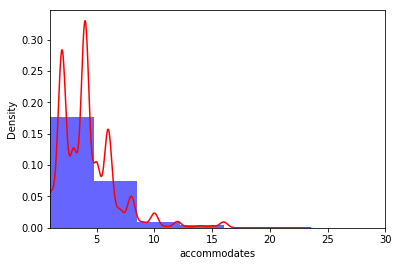

In [48]:
ax = df["accommodates"].hist(bins=4, density=True, stacked=True, color='blue', alpha=0.6)
df["accommodates"].plot(kind='density', color='red')
ax.set(xlabel='accommodates')
plt.xlim(1,30)
plt.show()

### É possível perceber que a maioria dos valores de quantas pessoas aquele imóvel acomoda "accomodate" está entre 1 e 10 pessoas.

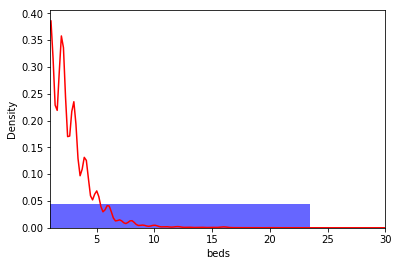

In [49]:
ax = df["beds"].hist(bins=4, density=True, stacked=True, color='blue', alpha=0.6)
df["beds"].plot(kind='density', color='red')
ax.set(xlabel='beds')
plt.xlim(1,30)
plt.show()

### Como era de se esperar, o número de camas segue a mesma tendência

### Antes de começar o treinamento, é importante lembrar que as classes estão desbalanceadas. A categoria hotel_room conta com apenas 56 amostras. Utilizando o algoritmo SMOTE (Synthetic Minority Over-sampling Technique) é possível gerar amostras artificiais das classes com menos amostras. Referência -> https://arxiv.org/pdf/1106.1813.pdf

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)

### Vamos dividir os dataframes das variáveis independentes (X) e da alvo (Y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

### Para saber das features selecionados quais são mais relevantes, é possível se fazer um "weak learner" como uma random forest ou decision forest para saber quais atributos conseguem melhor separar os dados. Utilizando o cálculo de importância. Mais em: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [62]:
from sklearn.ensemble import RandomForestClassifier
feature_names = [f"feature {i}" for i in (X.columns)]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Vamos agora, plotar os decrécimos de impuridade (MDI) ou GINI para essas features.
### Uma excelente explicação sobre MDI >https://blog.methodsconsultants.com/posts/be-aware-of-bias-in-rf-variable-importance-metrics/

Text(0,0.5,'Decrécimo da média de impuridade')

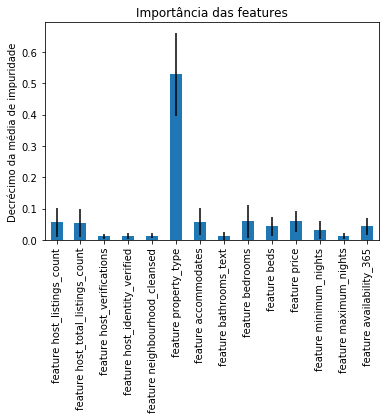

In [63]:
import pandas as pd

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importância das features")
ax.set_ylabel("Decrécimo da média de impuridade")

### É notório que as variáveis relacionadas ao imóvel (principalmente "property_type") são extremamentes relevantes para separação dos dados. As variáveis relacionadas ao propretário possuem um menor grau de relevância nessa modelagem

### Vamos criar o classificador, usando uma rede neural do keras

In [64]:
def create_model():
    model = Sequential()
    model.add(Dense(14, input_dim=14, activation='softmax',kernel_initializer='lecun_normal'))
    model.add(Dense(28, activation='softmax',kernel_initializer='lecun_normal'))
    model.add(Dense(4, activation='softmax',kernel_initializer='lecun_normal'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Vamos treinar um modelo em X_train e y_train e testar as predições em X_test para comparar com y_test

In [85]:
import sklearn.metrics as metrics
model = KerasClassifier(model=create_model, epochs=15, batch_size=10, verbose=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
y_pred = y_test.values.tolist()
matrix = metrics.confusion_matrix(predictions, y_pred)

In [86]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :\n", confusion_matrix(predictions, y_pred))

Confusion Matrix :
 [[3688   69  346   18]
 [  16 3392 1259  485]
 [ 333    8 2326   29]
 [   1  616  200 3550]]


### Vamos aplicar um cross validation 10 fold, para verificar a média da acurácia em 10 classificações

In [91]:
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier, KerasRegressor
cross_validation = KerasClassifier(model=create_model, epochs=150, batch_size=30, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(cross_validation, X_test, y_test, cv=kfold)
print("Acurácia médias dos 10 folds: %.2f%% " % (results.mean()*100))

Epoch 1/150
491/491 [==============================] - 1s 2ms/step - loss: 1.3772 - accuracy: 0.3361
Epoch 2/150
491/491 [==============================] - 1s 2ms/step - loss: 1.3057 - accuracy: 0.4176
Epoch 3/150
491/491 [==============================] - 1s 2ms/step - loss: 1.1958 - accuracy: 0.4497
Epoch 4/150
491/491 [==============================] - 1s 2ms/step - loss: 1.1462 - accuracy: 0.4599
Epoch 5/150
491/491 [==============================] - 1s 2ms/step - loss: 1.1127 - accuracy: 0.4942
Epoch 6/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0860 - accuracy: 0.5087
Epoch 7/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0703 - accuracy: 0.5137
Epoch 8/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0276 - accuracy: 0.5262
Epoch 9/150
491/491 [==============================] - 1s 2ms/step - loss: 0.9412 - accuracy: 0.5726
Epoch 10/150
491/491 [==============================] - 1s 2ms/step - loss: 0.9215 - accura

491/491 [==============================] - 1s 2ms/step - loss: 0.4883 - accuracy: 0.8440
Epoch 82/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5115 - accuracy: 0.8421
Epoch 83/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5332 - accuracy: 0.8328
Epoch 84/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.8451
Epoch 85/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5156 - accuracy: 0.8402
Epoch 86/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5089 - accuracy: 0.8409
Epoch 87/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4763 - accuracy: 0.8532
Epoch 88/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.8341
Epoch 89/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4688 - accuracy: 0.8571
Epoch 90/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4516 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 1.0833 - accuracy: 0.4771
Epoch 11/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0638 - accuracy: 0.4815
Epoch 12/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0513 - accuracy: 0.4903
Epoch 13/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0548 - accuracy: 0.5022
Epoch 14/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0452 - accuracy: 0.5151
Epoch 15/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0269 - accuracy: 0.5233
Epoch 16/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0195 - accuracy: 0.5163
Epoch 17/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0132 - accuracy: 0.5276
Epoch 18/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0081 - accuracy: 0.5274
Epoch 19/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0100 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 0.4351 - accuracy: 0.8639
Epoch 91/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4736 - accuracy: 0.8595
Epoch 92/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.8564
Epoch 93/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4518 - accuracy: 0.8655
Epoch 94/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3923 - accuracy: 0.8819
Epoch 95/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3879 - accuracy: 0.8852
Epoch 96/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3900 - accuracy: 0.8809
Epoch 97/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3576 - accuracy: 0.8955
Epoch 98/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.9001
Epoch 99/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 0.8776 - accuracy: 0.5063
Epoch 20/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8739 - accuracy: 0.5088
Epoch 21/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8756 - accuracy: 0.5091
Epoch 22/150
491/491 [==============================] - 1s 2ms/step - loss: 0.9115 - accuracy: 0.5054
Epoch 23/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8736 - accuracy: 0.5124
Epoch 24/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8732 - accuracy: 0.5141
Epoch 25/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8950 - accuracy: 0.5040
Epoch 26/150
491/491 [==============================] - 1s 2ms/step - loss: 0.9078 - accuracy: 0.4950
Epoch 27/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8870 - accuracy: 0.5085
Epoch 28/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8952 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 0.6577 - accuracy: 0.6721
Epoch 100/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.6642
Epoch 101/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6410 - accuracy: 0.6789
Epoch 102/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6351 - accuracy: 0.6822
Epoch 103/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6408 - accuracy: 0.6829
Epoch 104/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6223 - accuracy: 0.6885
Epoch 105/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6358 - accuracy: 0.6828
Epoch 106/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6166 - accuracy: 0.6915
Epoch 107/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6000 - accuracy: 0.6949
Epoch 108/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6133 - a

491/491 [==============================] - 1s 2ms/step - loss: 0.8281 - accuracy: 0.6613
Epoch 29/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8097 - accuracy: 0.6713
Epoch 30/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8051 - accuracy: 0.6716
Epoch 31/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8010 - accuracy: 0.6728
Epoch 32/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8066 - accuracy: 0.6717
Epoch 33/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8045 - accuracy: 0.6779
Epoch 34/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8254 - accuracy: 0.6760
Epoch 35/150
491/491 [==============================] - 1s 2ms/step - loss: 0.8064 - accuracy: 0.6828
Epoch 36/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7987 - accuracy: 0.6847
Epoch 37/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7981 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7976
Epoch 109/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.8053
Epoch 110/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.8123
Epoch 111/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5088 - accuracy: 0.8026
Epoch 112/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4754 - accuracy: 0.8108
Epoch 113/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.8096
Epoch 114/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4937 - accuracy: 0.8186
Epoch 115/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4491 - accuracy: 0.8245
Epoch 116/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4708 - accuracy: 0.8172
Epoch 117/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4465 - a

491/491 [==============================] - 1s 2ms/step - loss: 0.7076 - accuracy: 0.7197
Epoch 38/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6996 - accuracy: 0.7202
Epoch 39/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6707 - accuracy: 0.7360
Epoch 40/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6437 - accuracy: 0.7423
Epoch 41/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7657 - accuracy: 0.7132
Epoch 42/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7267 - accuracy: 0.7175
Epoch 43/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7129 - accuracy: 0.7198
Epoch 44/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6494 - accuracy: 0.7411
Epoch 45/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6378 - accuracy: 0.7471
Epoch 46/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6426 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 0.4999 - accuracy: 0.8468
Epoch 118/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4531 - accuracy: 0.8627
Epoch 119/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4919 - accuracy: 0.8517
Epoch 120/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4654 - accuracy: 0.8625
Epoch 121/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4349 - accuracy: 0.8677
Epoch 122/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4460 - accuracy: 0.8659
Epoch 123/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4232 - accuracy: 0.8731
Epoch 124/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8734
Epoch 125/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4045 - accuracy: 0.8778
Epoch 126/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4581 - a

491/491 [==============================] - 1s 2ms/step - loss: 0.7407 - accuracy: 0.6334
Epoch 47/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7018 - accuracy: 0.6345
Epoch 48/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7888 - accuracy: 0.6286
Epoch 49/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7668 - accuracy: 0.6268
Epoch 50/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7758 - accuracy: 0.6222
Epoch 51/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7627 - accuracy: 0.6318
Epoch 52/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7330 - accuracy: 0.6337
Epoch 53/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7459 - accuracy: 0.6316
Epoch 54/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7517 - accuracy: 0.6302
Epoch 55/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7471 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 0.6769 - accuracy: 0.6517
Epoch 127/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7135 - accuracy: 0.6503
Epoch 128/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7081 - accuracy: 0.6577
Epoch 129/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6618 - accuracy: 0.6575
Epoch 130/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6827 - accuracy: 0.6602
Epoch 131/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.6599
Epoch 132/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6593 - accuracy: 0.6660
Epoch 133/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6526 - accuracy: 0.6664
Epoch 134/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6762 - accuracy: 0.6656
Epoch 135/150
491/491 [==============================] - 1s 2ms/step - loss: 0.7438 - a

491/491 [==============================] - 1s 2ms/step - loss: 0.5734 - accuracy: 0.7676
Epoch 56/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5727 - accuracy: 0.7698
Epoch 57/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5769 - accuracy: 0.7703
Epoch 58/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5398 - accuracy: 0.7762
Epoch 59/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5858 - accuracy: 0.7640
Epoch 60/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7756
Epoch 61/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6085 - accuracy: 0.7578
Epoch 62/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5274 - accuracy: 0.7853
Epoch 63/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.7866
Epoch 64/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 0.2871 - accuracy: 0.9048
Epoch 136/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8912
Epoch 137/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3165 - accuracy: 0.8980
Epoch 138/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8822
Epoch 139/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8872
Epoch 140/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3638 - accuracy: 0.8887
Epoch 141/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8908
Epoch 142/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.8964
Epoch 143/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2903 - accuracy: 0.9080
Epoch 144/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2738 - a

491/491 [==============================] - 1s 2ms/step - loss: 0.3562 - accuracy: 0.8867
Epoch 65/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8940
Epoch 66/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2990 - accuracy: 0.9110
Epoch 67/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3510 - accuracy: 0.8909
Epoch 68/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3189 - accuracy: 0.9070
Epoch 69/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.9175
Epoch 70/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3215 - accuracy: 0.9063
Epoch 71/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2940 - accuracy: 0.9161
Epoch 72/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.9110
Epoch 73/150
491/491 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 0.2320 - accuracy: 0.9363
Epoch 145/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2224 - accuracy: 0.9367
Epoch 146/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2273 - accuracy: 0.9369
Epoch 147/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2259 - accuracy: 0.9337
Epoch 148/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.9310
Epoch 149/150
491/491 [==============================] - 1s 2ms/step - loss: 0.2262 - accuracy: 0.9377
Epoch 150/150
55/55 [==============================] - 0s 648us/step
Epoch 1/150
491/491 [==============================] - 1s 2ms/step - loss: 1.3746 - accuracy: 0.3272
Epoch 2/150
491/491 [==============================] - 1s 2ms/step - loss: 1.2910 - accuracy: 0.4441
Epoch 3/150
491/491 [==============================] - 1s 2ms/step - loss: 1.1950 - accuracy: 0.4651
Epoch 4/150
491/491 [===

491/491 [==============================] - 1s 2ms/step - loss: 0.4974 - accuracy: 0.8357
Epoch 74/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4969 - accuracy: 0.8368
Epoch 75/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.8209
Epoch 76/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.8298
Epoch 77/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5463 - accuracy: 0.8278
Epoch 78/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5398 - accuracy: 0.8284
Epoch 79/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5096 - accuracy: 0.8383
Epoch 80/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4773 - accuracy: 0.8433
Epoch 81/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.8353
Epoch 82/150
491/491 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 

491/491 [==============================] - 1s 2ms/step - loss: 1.3247 - accuracy: 0.3910
Epoch 3/150
491/491 [==============================] - 1s 2ms/step - loss: 1.2267 - accuracy: 0.4146
Epoch 4/150
491/491 [==============================] - 1s 2ms/step - loss: 1.1878 - accuracy: 0.4254
Epoch 5/150
491/491 [==============================] - 1s 2ms/step - loss: 1.1643 - accuracy: 0.4390
Epoch 6/150
491/491 [==============================] - 1s 2ms/step - loss: 1.1334 - accuracy: 0.4512
Epoch 7/150
491/491 [==============================] - 1s 2ms/step - loss: 1.1141 - accuracy: 0.4579
Epoch 8/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0873 - accuracy: 0.4676
Epoch 9/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0705 - accuracy: 0.4798
Epoch 10/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0657 - accuracy: 0.4807
Epoch 11/150
491/491 [==============================] - 1s 2ms/step - loss: 1.0568 - accuracy: 0.4870


491/491 [==============================] - 1s 2ms/step - loss: 0.6498 - accuracy: 0.7253
Epoch 83/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6320 - accuracy: 0.7313
Epoch 84/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6228 - accuracy: 0.7324
Epoch 85/150
491/491 [==============================] - 1s 2ms/step - loss: 0.6074 - accuracy: 0.7418
Epoch 86/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5651 - accuracy: 0.7530
Epoch 87/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5953 - accuracy: 0.7445
Epoch 88/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5628 - accuracy: 0.7526
Epoch 89/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5696 - accuracy: 0.7496
Epoch 90/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5658 - accuracy: 0.7537
Epoch 91/150
491/491 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 

### A modelo proposto atingiu uma média de 85.62% de acurácia na validação cruzada, vamos tirar as outras métricas: precisão,recall e F1

In [94]:
from sklearn.metrics import precision_score
precision = precision_score(predictions, y_pred,average='weighted')
print(f"Precision: {precision}")

Precision: 0.817682432996383


In [95]:
from sklearn.metrics import recall_score
recall = recall_score(predictions, y_pred,average='weighted')
print(f"Recall: {recall}")

Recall: 0.7930950048971597


In [96]:
print(f"F1 score: {2 * (precision * recall) / (precision + recall)}")

F1 score: 0.8052010637169696
